# Ferry Problem

[Edward Lu](https://github.com/edwardlu71/notebooks)

<div>
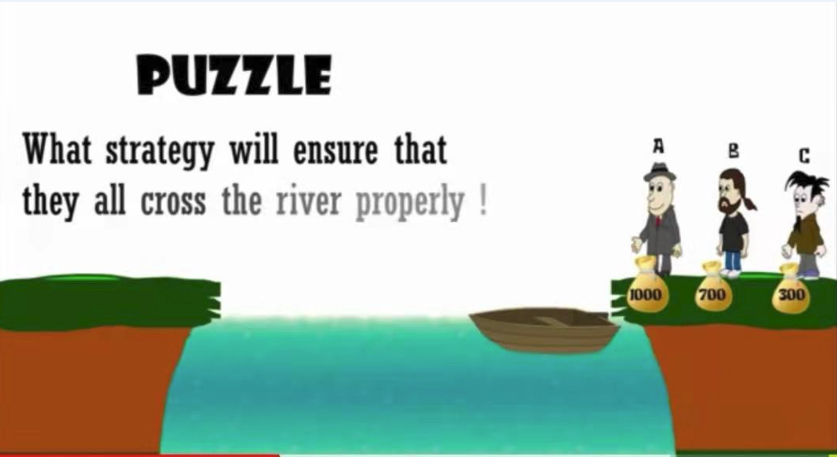
</div>

The boat can only carry two things, two people or one people + one bag or only one people. If one or two people stay alone with gold more than what they entitled, they will disappear with the gold. How to ship them safely to other side?

In [1]:
import itertools
import networkx as nx

In [2]:
A=10;B=7;C=3 # people's money
LR = [0,1] # left right
# dictionary below value 0 = left; 1=right
P = [{A:i, B:j, C:k} for i in LR for j in LR for k in LR ] # key=people, represent people with their money
Q = P.copy() # key=money
X = list(itertools.product(P,Q)) # comination of people and money

In [3]:
Z = list() # valid combination
for x in X:
    lp = sum([k for k,v in x[0].items() if v == 0]) 
    lm = sum([k for k,v in x[1].items() if v == 0])
    rp = sum([k for k,v in x[0].items() if v == 1])
    rm = sum([k for k,v in x[1].items() if v == 1])
    if not(((lp > 0) and (lm > lp)) or ((rp > 0) and (rm > rp))):
        Z.append(x)

In [4]:
ZZ = list(itertools.product(Z, [0,1]))
ZZi = [ list(w[0][0].values()) + list(w[0][1].values()) + [w[1]]  for w in ZZ] # flat ZZ
ZZ[0], ZZ[-1] # start and end states

((({10: 0, 7: 0, 3: 0}, {10: 0, 7: 0, 3: 0}), 0),
 (({10: 1, 7: 1, 3: 1}, {10: 1, 7: 1, 3: 1}), 1))

In [5]:
G = nx.DiGraph()
_ = [G.add_node(i) for i in list(range(len(ZZ)))]
for l, z in enumerate(ZZi):
    b = z[6]
    notb = int(not b)
    otherside = z.copy()
    otherside[6] = notb
    # one person move over
    for i in range(3):
        m = otherside.copy()
        if m[i] == b:
            m[i] = notb
        if m[:-1] != z[:-1] and m in ZZi:
            l2 = ZZi.index(m)
            G.add_edge(l, l2)
    # one person and one bag move over
    for i in range(3):
        for j in range(3,6):
            m = otherside.copy()
            if m[i] == b and m[j] == b:
                m[i] = notb
                m[j] = notb
            if m[:-1] != z[:-1] and m in ZZi:
                l2 = ZZi.index(m)
                G.add_edge(l, l2)
    # two person move over
    for i, j in list(itertools.combinations(range(3), 2)):
        m = otherside.copy()
        if m[i] == b and m[j] == b:
            m[i] = notb
            m[j] = notb
        if m[:-1] != z[:-1] and m in ZZi:
            l2 = ZZi.index(m)
            G.add_edge(l, l2)

In [6]:
path = nx.shortest_path(G,0,47)
for i, j in enumerate(path):
    ee = ZZ[j]
    print(f"{i} Mr {[k for (k,v) in ee[0][0].items() if v==0]} + bags {[k for (k,v) in ee[0][1].items() if v==0]} |", 'uu.....' if ee[1]==0 else '.....uu',f"| Mr {[k for (k,v) in ee[0][0].items() if v==1]} + bags {[k for (k,v) in ee[0][1].items() if v==1]}")

0 Mr [10, 7, 3] + bags [10, 7, 3] | uu..... | Mr [] + bags []
1 Mr [10, 3] + bags [10, 3] | .....uu | Mr [7] + bags [7]
2 Mr [10, 7, 3] + bags [10, 3] | uu..... | Mr [] + bags [7]
3 Mr [7, 3] + bags [10] | .....uu | Mr [10] + bags [7, 3]
4 Mr [10, 7, 3] + bags [10] | uu..... | Mr [] + bags [7, 3]
5 Mr [10] + bags [10] | .....uu | Mr [7, 3] + bags [7, 3]
6 Mr [10, 7] + bags [10, 7] | uu..... | Mr [3] + bags [3]
7 Mr [7] + bags [7] | .....uu | Mr [10, 3] + bags [10, 3]
8 Mr [7, 3] + bags [7, 3] | uu..... | Mr [10] + bags [10]
9 Mr [] + bags [7, 3] | .....uu | Mr [10, 7, 3] + bags [10]
10 Mr [10] + bags [7, 3] | uu..... | Mr [7, 3] + bags [10]
11 Mr [] + bags [7] | .....uu | Mr [10, 7, 3] + bags [10, 3]
12 Mr [7] + bags [7] | uu..... | Mr [10, 3] + bags [10, 3]
13 Mr [] + bags [] | .....uu | Mr [10, 7, 3] + bags [10, 7, 3]
